# **Visualization with Plotly Express**

Crafting the perfect visualization can sometimes be overwhelming as well as time-consuming in any data analysis process.

We will use an excellent tool for visualization called [Plotly](https://plotly.com/python/getting-started/#overview). 

With this library, we can create powerful interactive visualizations in no time with some added benefits:
- Zooming in
- Isolating data
- Lots of choices by expanding on the basic options like bar, line and scatter and going beyond them

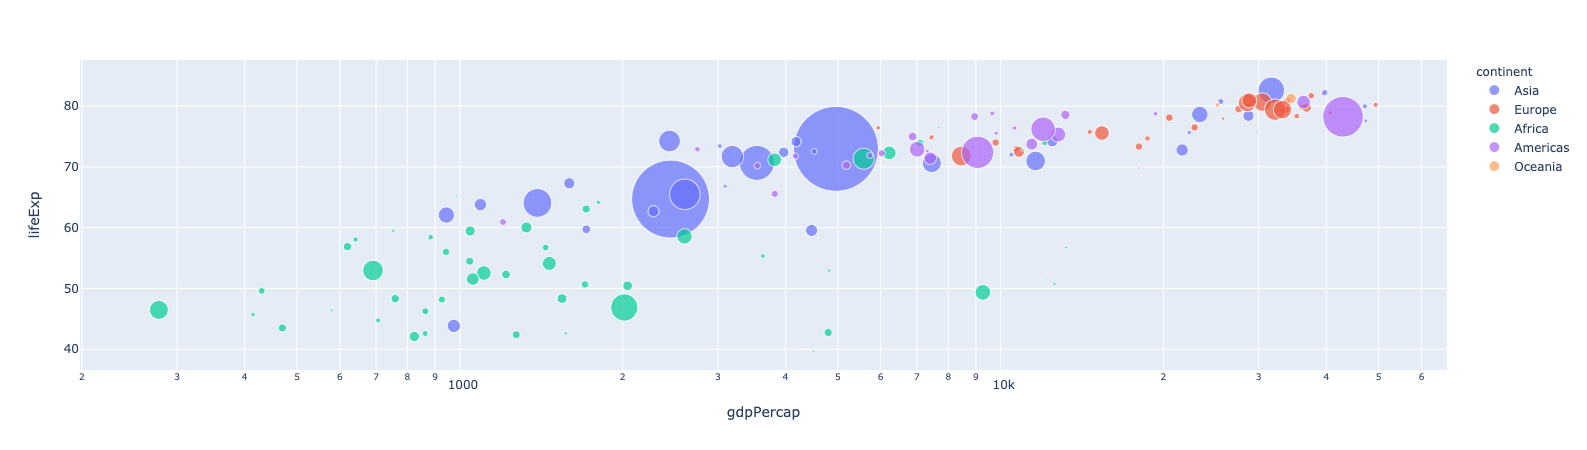

In [14]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp", size="pop", color="continent",
           hover_name="country", log_x=True, size_max=60)
fig.show()

## **What is Plotly Express?**
Plotly Express is a bundle within Plotly that provides charts out-of-the-box with even less code than the usual code when using Plotly.

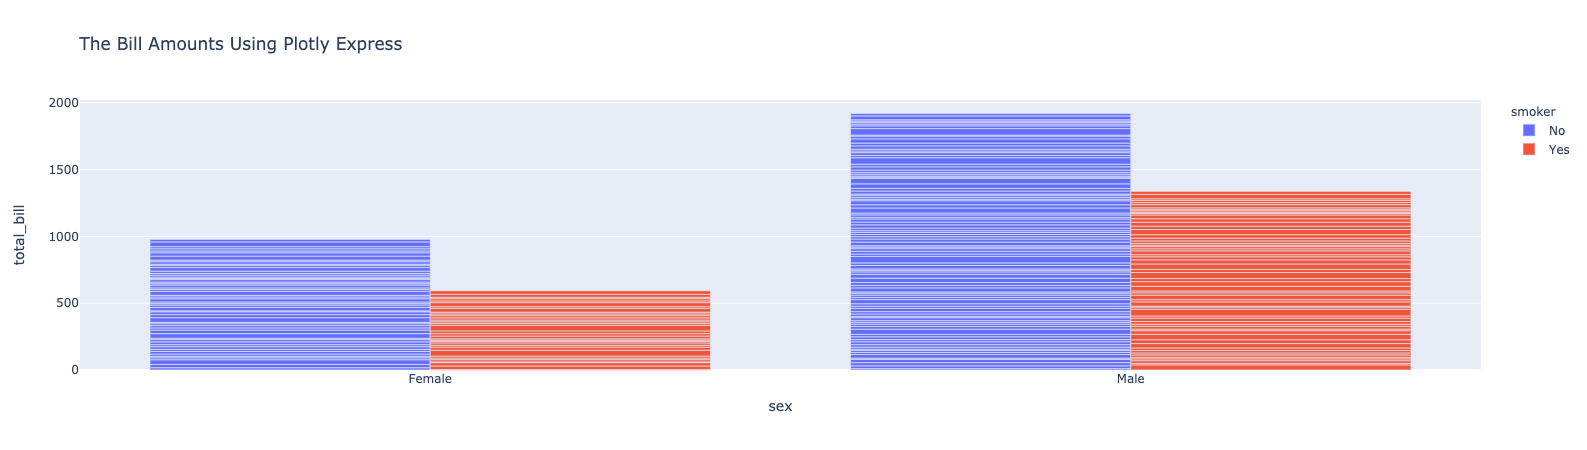

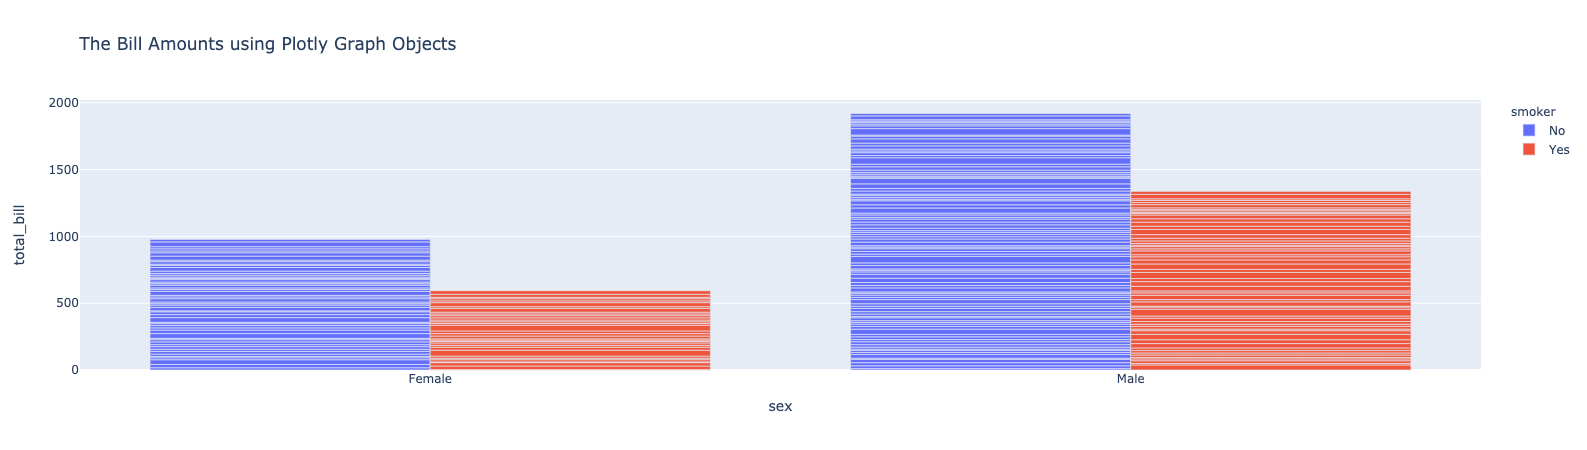

In [108]:
# Using Plotly Express
import plotly.express as px
df = px.data.tips()
fig = px.bar(df, x="sex", y="total_bill", color="smoker", barmode="group", title="The Bill Amounts Using Plotly Express")
fig.show()

# Using Plotly Graph Objects
import plotly.graph_objects as go
df_test = px.data.tips()

smoker = df_test[df_test["smoker"].isin(["Yes"])][["sex","total_bill"]]
not_smoker = df_test[df_test["smoker"].isin(["No"])][["sex","total_bill"]]

fig = go.Figure(data=[
    go.Bar(name='No', x=not_smoker["sex"], y=not_smoker["total_bill"]),
    go.Bar(name='Yes', x=smoker["sex"], y=smoker["total_bill"])
])
# Change the bar mode
fig.update_layout(
    barmode='group',
    xaxis_title="sex",
    yaxis_title="total_bill",
    legend_title="smoker",
    title="The Bill Amounts using Plotly Graph Objects"
)
fig.show()

## **Plotly Express Available Figures**


- Basics: scatter, line, area, bar, funnel, timeline
- Part-of-Whole: pie, sunburst, treemap, funnel_area
- 1D Distributions: histogram, box, violin, strip
- 2D Distributions: density_heatmap, density_contour
- Matrix Input: imshow
- 3-Dimensional: scatter_3d, line_3d
- Multidimensional: scatter_matrix, parallel_coordinates, parallel_categories
- Tile Maps: scatter_mapbox, line_mapbox, **choropleth_mapbox**, density_mapbox
- Outline Maps: scatter_geo, line_geo, choropleth
- Polar Charts: scatter_polar, line_polar, bar_polar
- Ternary Charts: scatter_ternary, line_ternary

## **Let's See the Charts in Action!**
Let's prep the data first. We'll create POI profiles created for the POI list containing Thai Express locations.

In [1]:
import pandas as pd 
import locussdk as locus 
import plotly.express as px

In [2]:
all_pois = locus.get_avail_poi_lists('global')

In [3]:
all_pois[all_pois['name'] == 'Thaiexpress']

,name,poi_list_id,whitelabelid,customerid
260,Thaiexpress,265,None,None


In [4]:
pois = locus.get_pois(265)

We'll filter out the POIs to only include the ones in Ontario for better visualization.

In [5]:
pois_ontario = pois[pois['region'] == 'ON'].reset_index()

In [6]:
locus.list_enrichment('demographic')

{'categories': ['Education Breakdown',
  'Household Marital Status',
  'Household Income Sources',
  'Resident Age Breakdown',
  'Household Income']}

Next, we'll start creating our POI profiles by adding demographic data 500m around each POI.  Let's start with Education Breakdown.

In [7]:
pois_ontario = locus.enrich(pois_ontario, 'demographic', 'Education Breakdown', distance = 500)

In [8]:
pois_ontario

,index,id,name,city,region,postalCode,country,addressLabel,lat,lon,coords,chainId,"No Certificate, Diploma or Degree (Residents)",Highschool Diploma or GED (Residents),College Diploma (Graduates),Bachelor Degree (Residents),Post Graduate Degree or Diploma (Graduates)
0,87,51504,Thaiexpress - South Keys,Ottawa,ON,J1V 1J5,CA,"2210 Bank street,Ottawa,ON,J1V 1J5, Canada",45.359382,-75.657758,"45.3593819, -75.657758",264,127.0,104.0,20.0,48.0,32.0
1,135,51552,Thaiexpress - TrainYards,Ottawa,ON,K1G 0Z1,CA,"525 Industrial Avenue,Ottawa,ON,K1G 0Z1, Canada",45.411981,-75.646105,"45.4119809, -75.6461054",264,96.0,54.0,17.0,36.0,25.0
2,136,51553,Thaiexpress - Billings Bridge Shopping Centre,Ottawa,ON,K1H 7X6,CA,"2277 Riverside Drive,Ottawa,ON,K1H 7X6, Canada",45.385545,-75.677200,"45.3855452, -75.6771996",264,214.0,152.0,22.0,64.0,27.0
3,137,51554,Thaiexpress - St-Laurent Centre,Ottawa,ON,K1K 3B8,CA,"1200 St-Laurent Blvd,Ottawa,ON,K1K 3B8, Canada",45.422657,-75.638464,"45.4226575, -75.6384639",264,452.0,126.0,58.0,39.0,24.0
4,138,51555,Thaiexpress - Rideau Centre,Ottawa,ON,K1N 9J7,CA,"50 Rideau Street,Ottawa,ON,K1N 9J7, Canada",45.424872,-75.689834,"45.4248722, -75.6898335",264,153.0,151.0,49.0,170.0,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,219,51636,Thaiexpress - Lambton Mall,Sarnia,ON,N7S 1P8,CA,"1380 London Road,Sarnia,ON,N7S 1P8, Canada",42.982605,-82.351678,"42.9826053, -82.3516776",264,105.0,38.0,25.0,4.0,2.0
86,220,51637,Thaiexpress - New Sudbury,Sudbury,ON,P3A 1Z2,CA,"349 Lasalle Blvd,Sudbury,ON,P3A 1Z2, Canada",46.521991,-80.978557,"46.5219906, -80.9785566",264,99.0,18.0,12.0,6.0,1.0
87,221,51638,Thaiexpress - Intercity Shopping Centre,Thunder Bay,ON,P7B 6B9,CA,"1000 Fort William Road,Thunder Bay,ON,P7B 6B9,...",48.402808,-89.244777,"48.4028079, -89.244777",264,112.0,19.0,11.0,7.0,4.0
88,262,51679,Thaiexpress,Oakville,ON,L6M 0L8,CA,"3001 Hospital Gate,Oakville,ON,L6M 0L8, Canada",43.451238,-79.764074,"43.451238, -79.764074",264,50.0,30.0,5.0,14.0,8.0


We'll add a few more categories for demographic data.

In [25]:
pois_ontario = locus.enrich(pois_ontario, 'demographic', 'Household Marital Status', distance = 500)
pois_ontario = locus.enrich(pois_ontario, 'demographic', 'Resident Age Breakdown', distance = 500)
pois_ontario = locus.enrich(pois_ontario, 'demographic', 'Household Income', distance = 500)
pois_ontario

,index,id,name,city,region,postalCode,country,addressLabel,lat,lon,coords,chainId,"No Certificate, Diploma or Degree (Residents)",Highschool Diploma or GED (Residents),College Diploma (Graduates),Bachelor Degree (Residents),Post Graduate Degree or Diploma (Graduates),Married (people),Not Married (people),Age 0 to 19 (people),Age 20 to 29 (people),Age 30 to 39 (people),Age 40 to 49 (people),Age 50 to 59 (people),Age 60 to 69 (people),Age 70 and Greater (people),"All families (Dollars, CAD)","Families with Children (Dollars, CAD)","Families without Children (Dollars, CAD)"
0,87,51504,Thaiexpress - South Keys,Ottawa,ON,J1V 1J5,CA,"2210 Bank street,Ottawa,ON,J1V 1J5, Canada",45.359382,-75.657758,"45.3593819, -75.657758",264,127.0,104.0,20.0,48.0,32.0,750.0,668.0,300.0,224.0,170.0,155.0,220.0,237.0,313.0,104107.0,101698.0,125447.0
1,135,51552,Thaiexpress - TrainYards,Ottawa,ON,K1G 0Z1,CA,"525 Industrial Avenue,Ottawa,ON,K1G 0Z1, Canada",45.411981,-75.646105,"45.4119809, -75.6461054",264,96.0,54.0,17.0,36.0,25.0,396.0,423.0,174.0,172.0,128.0,106.0,117.0,95.0,155.0,89290.0,88610.0,106540.0
2,136,51553,Thaiexpress - Billings Bridge Shopping Centre,Ottawa,ON,K1H 7X6,CA,"2277 Riverside Drive,Ottawa,ON,K1H 7X6, Canada",45.385545,-75.677200,"45.3855452, -75.6771996",264,214.0,152.0,22.0,64.0,27.0,650.0,818.0,307.0,332.0,204.0,187.0,215.0,180.0,244.0,89371.0,87072.0,120055.0
3,137,51554,Thaiexpress - St-Laurent Centre,Ottawa,ON,K1K 3B8,CA,"1200 St-Laurent Blvd,Ottawa,ON,K1K 3B8, Canada",45.422657,-75.638464,"45.4226575, -75.6384639",264,452.0,126.0,58.0,39.0,24.0,712.0,965.0,655.0,335.0,283.0,283.0,292.0,184.0,131.0,59928.0,76883.0,63252.0
4,138,51555,Thaiexpress - Rideau Centre,Ottawa,ON,K1N 9J7,CA,"50 Rideau Street,Ottawa,ON,K1N 9J7, Canada",45.424872,-75.689834,"45.4248722, -75.6898335",264,153.0,151.0,49.0,170.0,110.0,852.0,1568.0,164.0,698.0,477.0,317.0,346.0,271.0,238.0,74608.0,79329.0,83475.0
5,139,51556,Thaiexpress - World Exchange Plaza,Ottawa,ON,K1P 1A5,CA,"111 Albert street,Ottawa,ON,K1P 1A5, Canada",45.421543,-75.698011,"45.4215425, -75.6980106",264,184.0,149.0,63.0,179.0,132.0,1269.0,1961.0,230.0,934.0,707.0,400.0,438.0,365.0,303.0,100874.0,109166.0,96318.0
6,140,51557,Thaiexpress - Innes Road,Orleans,ON,K1W 0C8,CA,"3712 Innes Road,Orleans,ON,K1W 0C8, Canada",45.449633,-75.517291,"45.449633, -75.5172908",264,151.0,82.0,23.0,24.0,16.0,807.0,488.0,366.0,196.0,184.0,220.0,282.0,192.0,111.0,127155.0,114562.0,146088.0
7,141,51558,Thaiexpress - Carlingwood Mall,Ottawa,ON,K2A 1H2,CA,"2121 Carling Avenue Unit 721k,Ottawa,ON,K2A 1H...",45.372775,-75.768427,"45.3727754, -75.7684269",264,292.0,102.0,45.0,50.0,33.0,1138.0,1233.0,419.0,314.0,267.0,311.0,376.0,369.0,633.0,100275.0,89802.0,137783.0
8,142,51559,Thaiexpress - Bayshore Shopping Centre,Ottawa,ON,K2B 8C1,CA,"100 Bayshore Dr.,Ottawa,ON,K2B 8C1, Canada",45.347414,-75.807050,"45.3474139, -75.8070502",264,361.0,182.0,48.0,84.0,51.0,1267.0,1180.0,782.0,607.0,467.0,366.0,323.0,223.0,270.0,81517.0,85091.0,84653.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


### Bar Graph

There are various ways to use the bar chart to visualize a single category or multiple categories of data.

#### Single Category

Let's say we are interested in knowing the population of single people at each of the Thai Express locations. We can do this using a simple bar chart.

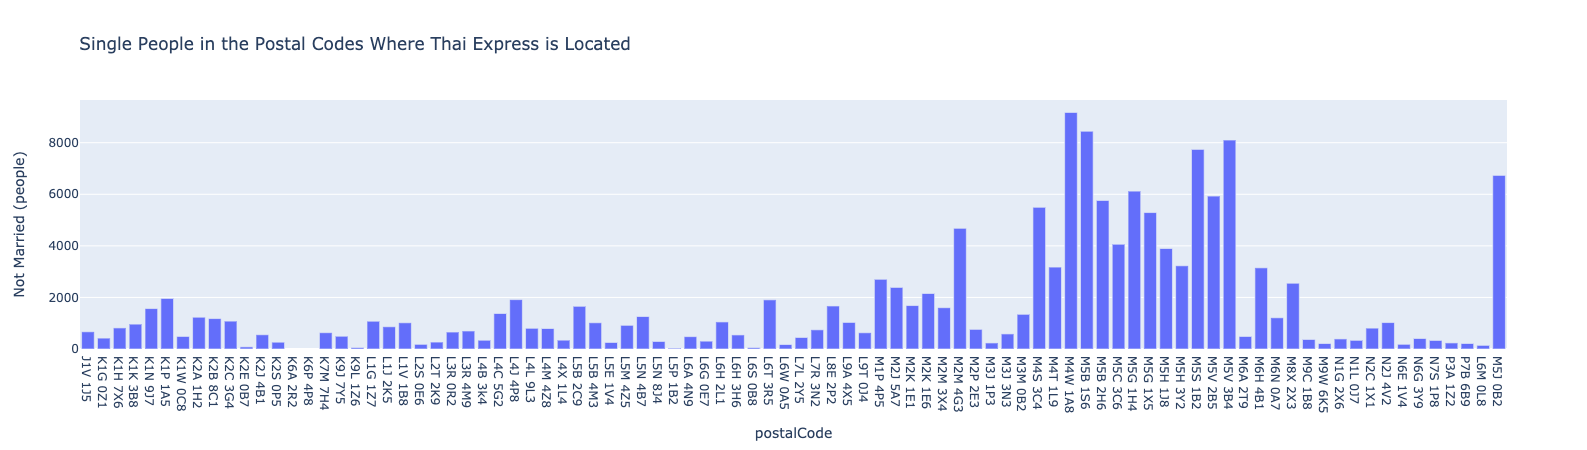

In [116]:
fig = px.bar(pois_ontario, x="postalCode", y="Not Married (people)", title="Single People in the Postal Codes Where Thai Express is Located")
fig.show()

In [118]:
pois_ontario[pois_ontario["Not Married (people)"] > 8000]

,index,id,name,city,region,postalCode,country,addressLabel,lat,lon,coords,chainId,"No Certificate, Diploma or Degree (Residents)",Highschool Diploma or GED (Residents),College Diploma (Graduates),Bachelor Degree (Residents),Post Graduate Degree or Diploma (Graduates),Married (people),Not Married (people),Age 0 to 19 (people),Age 20 to 29 (people),Age 30 to 39 (people),Age 40 to 49 (people),Age 50 to 59 (people),Age 60 to 69 (people),Age 70 and Greater (people),"All families (Dollars, CAD)","Families with Children (Dollars, CAD)","Families without Children (Dollars, CAD)"
62,196,51613,Thaiexpress - Hudson Bay Centre,Toronto,ON,M4W 1A8,CA,"2 Bloor Street East,Toronto,ON,M4W 1A8, Canada",43.671515,-79.384708,"43.671515, -79.3847075",264,527.0,1301.0,268.0,1175.0,1062.0,6691.0,9173.0,1353.0,4916.0,3776.0,1742.0,1736.0,1457.0,1708.0,132221.0,129699.0,180765.0
63,197,51614,Thaiexpress - 372 Yonge Street,Toronto,ON,M5B 1S6,CA,"372 Yonge Street,Toronto,ON,M5B 1S6, Canada",43.658745,-79.382154,"43.6587451, -79.3821543",264,486.0,1621.0,192.0,1125.0,914.0,4538.0,8445.0,1471.0,5000.0,2887.0,1413.0,1420.0,896.0,668.0,85411.0,104969.0,76506.0
72,206,51623,Thaiexpress - 320 Front Street West,Toronto,ON,M5V 3B4,CA,"320 Front Street West,Toronto,ON,M5V 3B4, Canada",43.643662,-79.390928,"43.6436619, -79.3909279",264,276.0,556.0,206.0,967.0,552.0,5536.0,8104.0,798.0,5851.0,4637.0,1438.0,830.0,439.0,247.0,118432.0,123433.0,120059.0


#### Multiple Categories

Let's say we want to see both single and those in common-law or married relationships. We can see it as a grouped or stacked bar chart.

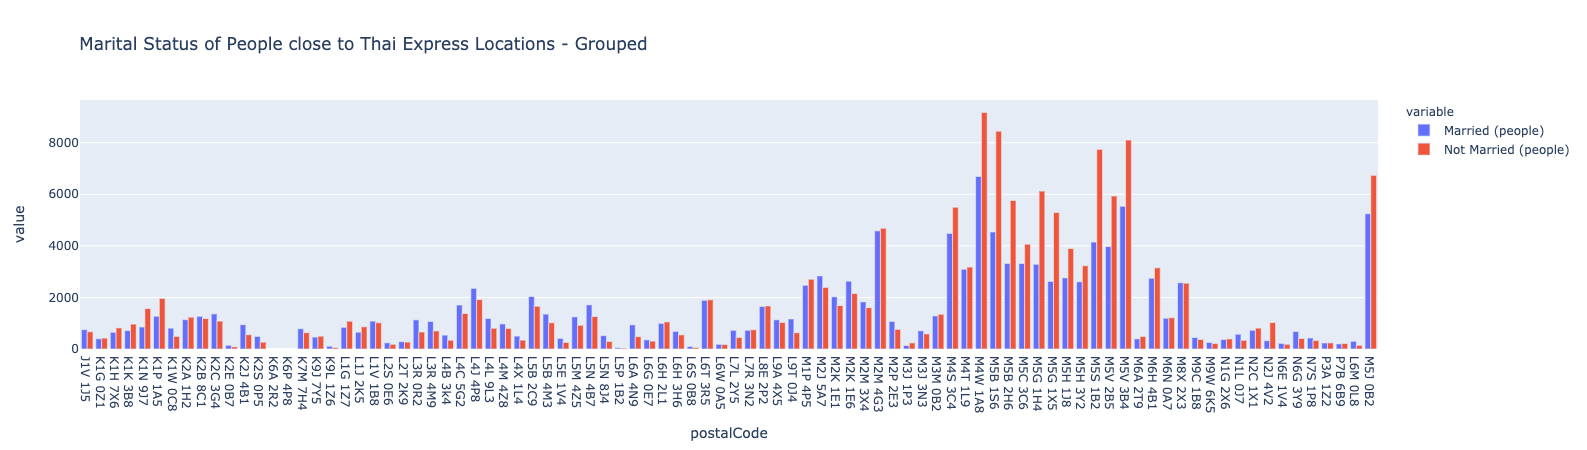

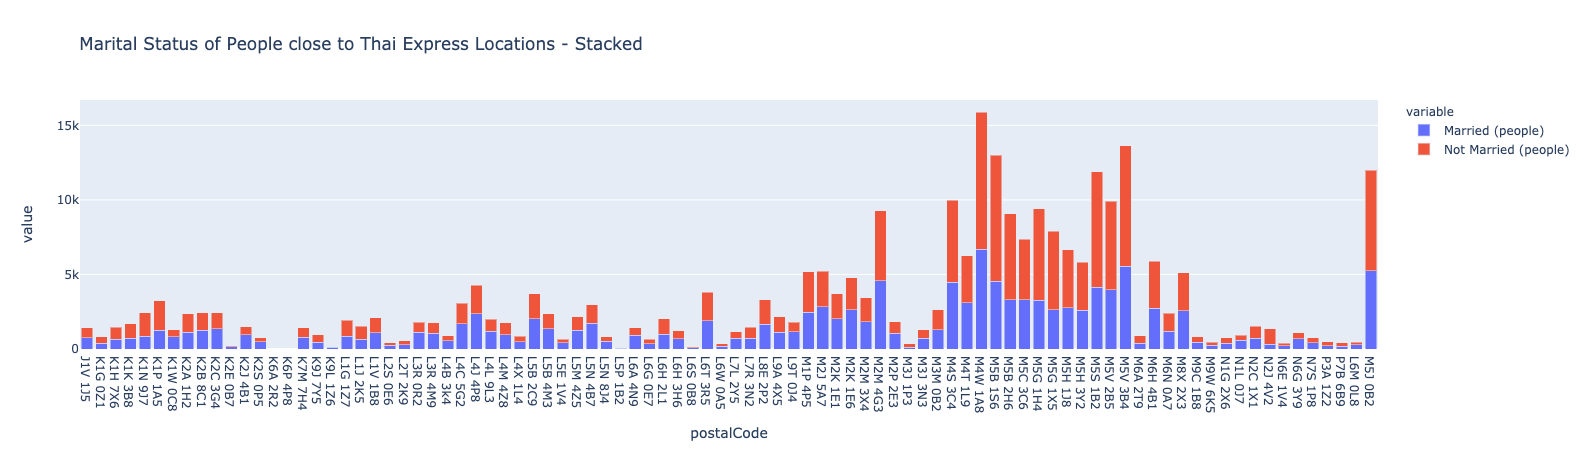

In [119]:
# Grouped
fig = px.bar(pois_ontario, x="postalCode", y=["Married (people)", "Not Married (people)"], barmode="group", title="Marital Status of People close to Thai Express Locations - Grouped")
fig.show()

# Stacked
fig = px.bar(pois_ontario, x="postalCode", y=["Married (people)", "Not Married (people)"], barmode="stack", title="Marital Status of People close to Thai Express Locations - Stacked")
fig.show()

## Scatter Mapbox

Now we'll demonstrate how to use a scatter mapbox chart with the same dataframe.

In [9]:
pois_ontario.head()

,id,name,city,region,postalCode,country,addressLabel,lat,lon,coords,...,Age 0 to 19 (people),Age 20 to 29 (people),Age 30 to 39 (people),Age 40 to 49 (people),Age 50 to 59 (people),Age 60 to 69 (people),Age 70 and Greater (people),"All families (Dollars, CAD)","Families with Children (Dollars, CAD)","Families without Children (Dollars, CAD)"
0,51504,Thaiexpress - South Keys,Ottawa,ON,J1V 1J5,CA,"2210 Bank street,Ottawa,ON,J1V 1J5, Canada",45.359382,-75.657758,"45.3593819, -75.657758",...,300.0,224.0,170.0,155.0,220.0,237.0,313.0,104107.0,101698.0,125447.0
1,51552,Thaiexpress - TrainYards,Ottawa,ON,K1G 0Z1,CA,"525 Industrial Avenue,Ottawa,ON,K1G 0Z1, Canada",45.411981,-75.646105,"45.4119809, -75.6461054",...,174.0,172.0,128.0,106.0,117.0,95.0,155.0,89290.0,88610.0,106540.0
2,51553,Thaiexpress - Billings Bridge Shopping Centre,Ottawa,ON,K1H 7X6,CA,"2277 Riverside Drive,Ottawa,ON,K1H 7X6, Canada",45.385545,-75.677200,"45.3855452, -75.6771996",...,307.0,332.0,204.0,187.0,215.0,180.0,244.0,89371.0,87072.0,120055.0
3,51554,Thaiexpress - St-Laurent Centre,Ottawa,ON,K1K 3B8,CA,"1200 St-Laurent Blvd,Ottawa,ON,K1K 3B8, Canada",45.422657,-75.638464,"45.4226575, -75.6384639",...,655.0,335.0,283.0,283.0,292.0,184.0,131.0,59928.0,76883.0,63252.0
4,51555,Thaiexpress - Rideau Centre,Ottawa,ON,K1N 9J7,CA,"50 Rideau Street,Ottawa,ON,K1N 9J7, Canada",45.424872,-75.689834,"45.4248722, -75.6898335",...,164.0,698.0,477.0,317.0,346.0,271.0,238.0,74608.0,79329.0,83475.0


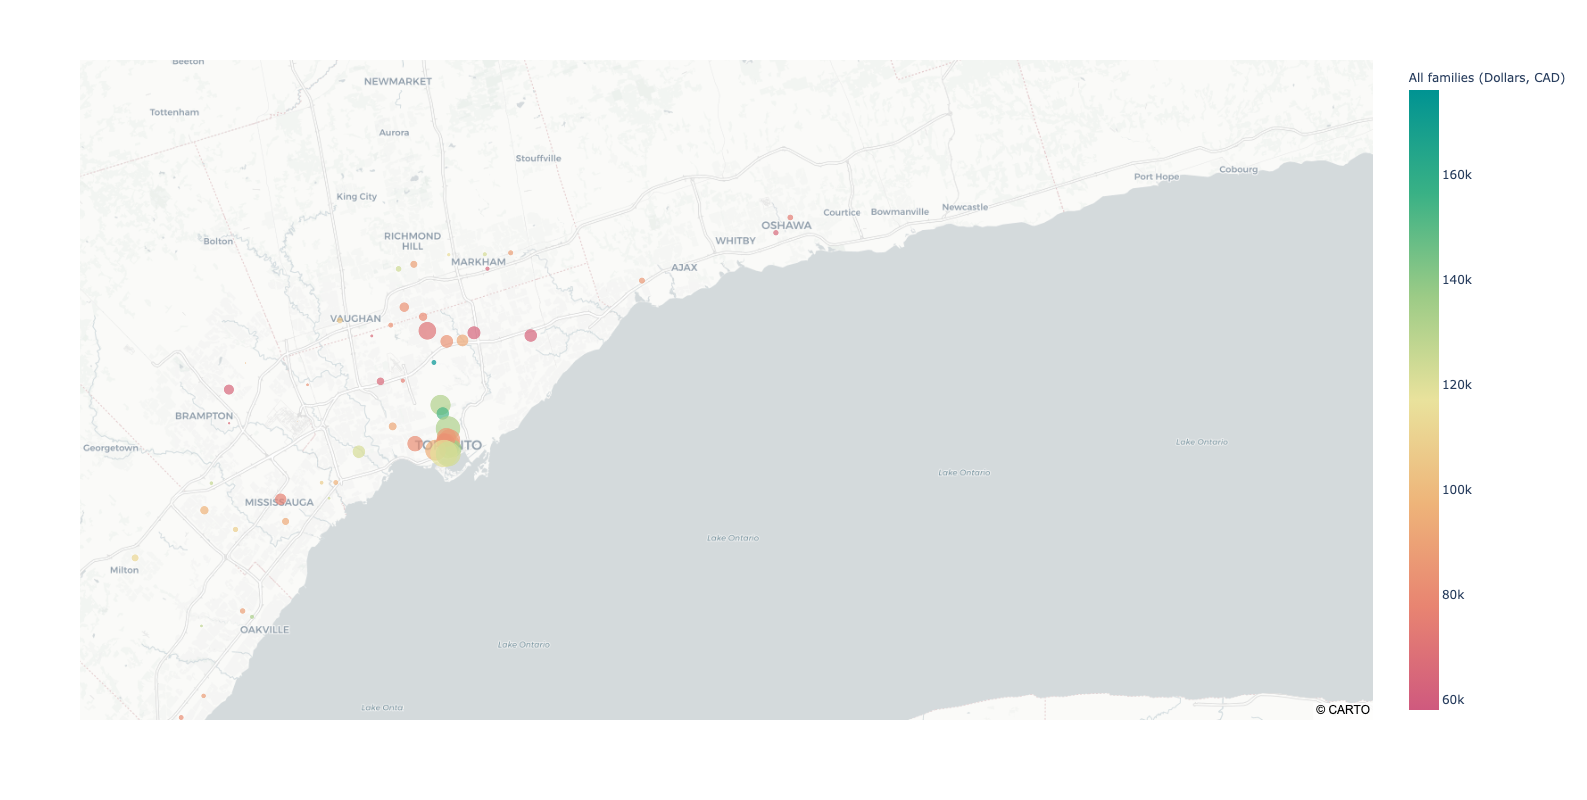

In [84]:

fig = px.scatter_mapbox(pois_ontario.dropna(), lat="lat", lon="lon", 
                        color="All families (Dollars, CAD)", 
                        color_continuous_scale="temps_r", 
                        zoom=7,
                        size='Age 30 to 39 (people)',
                        mapbox_style="carto-positron", 
                        center = {'lat':43.6472275, 'lon':-79.4045431}, 
                        hover_name='id',
                        height=800
                       )

fig.show()

## Choropleth

For Choropleth maps we will need to use a geojson structure.

So, let's define what is a [GeoJSON](https://tools.ietf.org/html/rfc7946).

### GeoJSON

A GeoJSON is a format for including a variety of geographic data points.

The [geometries](https://en.wikipedia.org/wiki/GeoJSON#Geometries) a GeoJSON supports are the following:

- Point 
- LineString 
- Polygon 
- MultiPoint 
- MultiLineString 
- MultiPolygon


These geographic data points are grouped in a FeatureCollection.

Each Feature will have 3 main properties `type`, `geometry` and `properties`

```python
{
  "type": "Feature",
  "geometry": {
    "type": "Point",
    "coordinates": [43.6708, -79.3897]
  },
  "properties": {
    "name": "EQ Works"
  }
}
```

GeoJSON structures can be generated using `LocusSDK`

In [24]:
locus.get_geojson_pc(['M5R3K4'])

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-79.3895345357902, 43.6710967750961],
      [-79.3895584379715, 43.6711031647793],
      [-79.3900267329473, 43.6709899509256],
      [-79.3899013971317, 43.6707155201052],
      [-79.3898948311815, 43.6707011417444],
      [-79.3896551393731, 43.67084309883],
      [-79.3894547533342, 43.6709617769645],
      [-79.3894601123943, 43.6710389271049],
      [-79.3895345357902, 43.6710967750961]]]},
   'properties': {'name': 'M5R3K4'}}]}

#### Objective
Get the number of people in the age range 20-29 in the FSAs where we have a restaurant 

In [85]:
pois_choropleth = locus.get_pois(265)
pois_choropleth_on = pois_choropleth[pois_choropleth['region'] == 'ON'].reset_index(drop=True)

In [86]:
pois_choropleth_on.head()

,id,name,city,region,postalCode,country,addressLabel,lat,lon,coords,chainId
0,51504,Thaiexpress - South Keys,Ottawa,ON,J1V 1J5,CA,"2210 Bank street,Ottawa,ON,J1V 1J5, Canada",45.359382,-75.657758,"45.3593819, -75.657758",264
1,51552,Thaiexpress - TrainYards,Ottawa,ON,K1G 0Z1,CA,"525 Industrial Avenue,Ottawa,ON,K1G 0Z1, Canada",45.411981,-75.646105,"45.4119809, -75.6461054",264
2,51553,Thaiexpress - Billings Bridge Shopping Centre,Ottawa,ON,K1H 7X6,CA,"2277 Riverside Drive,Ottawa,ON,K1H 7X6, Canada",45.385545,-75.677200,"45.3855452, -75.6771996",264
3,51554,Thaiexpress - St-Laurent Centre,Ottawa,ON,K1K 3B8,CA,"1200 St-Laurent Blvd,Ottawa,ON,K1K 3B8, Canada",45.422657,-75.638464,"45.4226575, -75.6384639",264
4,51555,Thaiexpress - Rideau Centre,Ottawa,ON,K1N 9J7,CA,"50 Rideau Street,Ottawa,ON,K1N 9J7, Canada",45.424872,-75.689834,"45.4248722, -75.6898335",264


In [87]:
pois_choropleth_on['FSA'] = pois_choropleth_on['postalCode'].apply(lambda x: x[:3])

In [88]:
pois_choropleth_on.head()

,id,name,city,region,postalCode,country,addressLabel,lat,lon,coords,chainId,FSA
0,51504,Thaiexpress - South Keys,Ottawa,ON,J1V 1J5,CA,"2210 Bank street,Ottawa,ON,J1V 1J5, Canada",45.359382,-75.657758,"45.3593819, -75.657758",264,J1V
1,51552,Thaiexpress - TrainYards,Ottawa,ON,K1G 0Z1,CA,"525 Industrial Avenue,Ottawa,ON,K1G 0Z1, Canada",45.411981,-75.646105,"45.4119809, -75.6461054",264,K1G
2,51553,Thaiexpress - Billings Bridge Shopping Centre,Ottawa,ON,K1H 7X6,CA,"2277 Riverside Drive,Ottawa,ON,K1H 7X6, Canada",45.385545,-75.677200,"45.3855452, -75.6771996",264,K1H
3,51554,Thaiexpress - St-Laurent Centre,Ottawa,ON,K1K 3B8,CA,"1200 St-Laurent Blvd,Ottawa,ON,K1K 3B8, Canada",45.422657,-75.638464,"45.4226575, -75.6384639",264,K1K
4,51555,Thaiexpress - Rideau Centre,Ottawa,ON,K1N 9J7,CA,"50 Rideau Street,Ottawa,ON,K1N 9J7, Canada",45.424872,-75.689834,"45.4248722, -75.6898335",264,K1N


In [89]:
# Group by FSA and getting the number (count) of locations we have in each FSA
grouped_per_fsa = pois_choropleth_on.groupby('FSA', as_index=False).agg({'id': 'count'})
grouped_per_fsa.rename(columns={'id': 'count'}, inplace=True)

In [90]:
grouped_per_fsa.sort_values('count', ascending=False).head()

,FSA,count
59,M5G,2
33,L5N,2
60,M5H,2
63,M5V,2
52,M3J,2


In [91]:
# Rename to use LocusSDK enrich method
grouped_per_fsa.rename(columns={'FSA': 'geo_id'}, inplace=True)

In [92]:
grouped_per_fsa = locus.enrich(grouped_per_fsa, 'demographic', 'Resident Age Breakdown')

In [93]:
grouped_per_fsa.head()

,geo_id,count,Age 0 to 19 (people),Age 20 to 29 (people),Age 30 to 39 (people),Age 40 to 49 (people),Age 50 to 59 (people),Age 60 to 69 (people),Age 70 and Greater (people)
0,J1V,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,K1G,1,6687.0,6130.0,4014.0,3749.0,4790.0,3415.0,4171.0
2,K1H,1,3332.0,2210.0,1683.0,1944.0,2430.0,2026.0,2564.0
3,K1K,1,6099.0,3870.0,3729.0,3719.0,4654.0,3595.0,4139.0
4,K1N,1,3389.0,6573.0,3734.0,2695.0,2863.0,2492.0,2655.0


In [94]:
geojson = locus.get_geojson_fsa(grouped_per_fsa['geo_id'].to_list())

In [95]:
# Inspect one of the features
geojson['features'][0]

{'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-78.869203, 43.935403],
    [-78.876699, 43.952245],
    [-78.92137, 43.942475],
    [-78.91418, 43.92499],
    [-78.891217, 43.930176],
    [-78.891075, 43.927992],
    [-78.889527, 43.927756],
    [-78.887897, 43.925214],
    [-78.885687, 43.924327],
    [-78.886192, 43.922364],
    [-78.885337, 43.921959],
    [-78.884376, 43.918764],
    [-78.88753, 43.918078],
    [-78.887254, 43.917469],
    [-78.884026, 43.91686],
    [-78.881783, 43.91347],
    [-78.883012, 43.913058],
    [-78.882768, 43.912515],
    [-78.879568, 43.91327],
    [-78.878122, 43.91227],
    [-78.879481, 43.910636],
    [-78.8767, 43.906632],
    [-78.874718, 43.905163],
    [-78.875523, 43.903505],
    [-78.869747, 43.89939],
    [-78.865938, 43.893087],
    [-78.861009, 43.89443],
    [-78.861553, 43.895612],
    [-78.855319, 43.897036],
    [-78.855872, 43.89826],
    [-78.862108, 43.896794],
    [-78.862593, 43.897816],
    [-78.860992, 

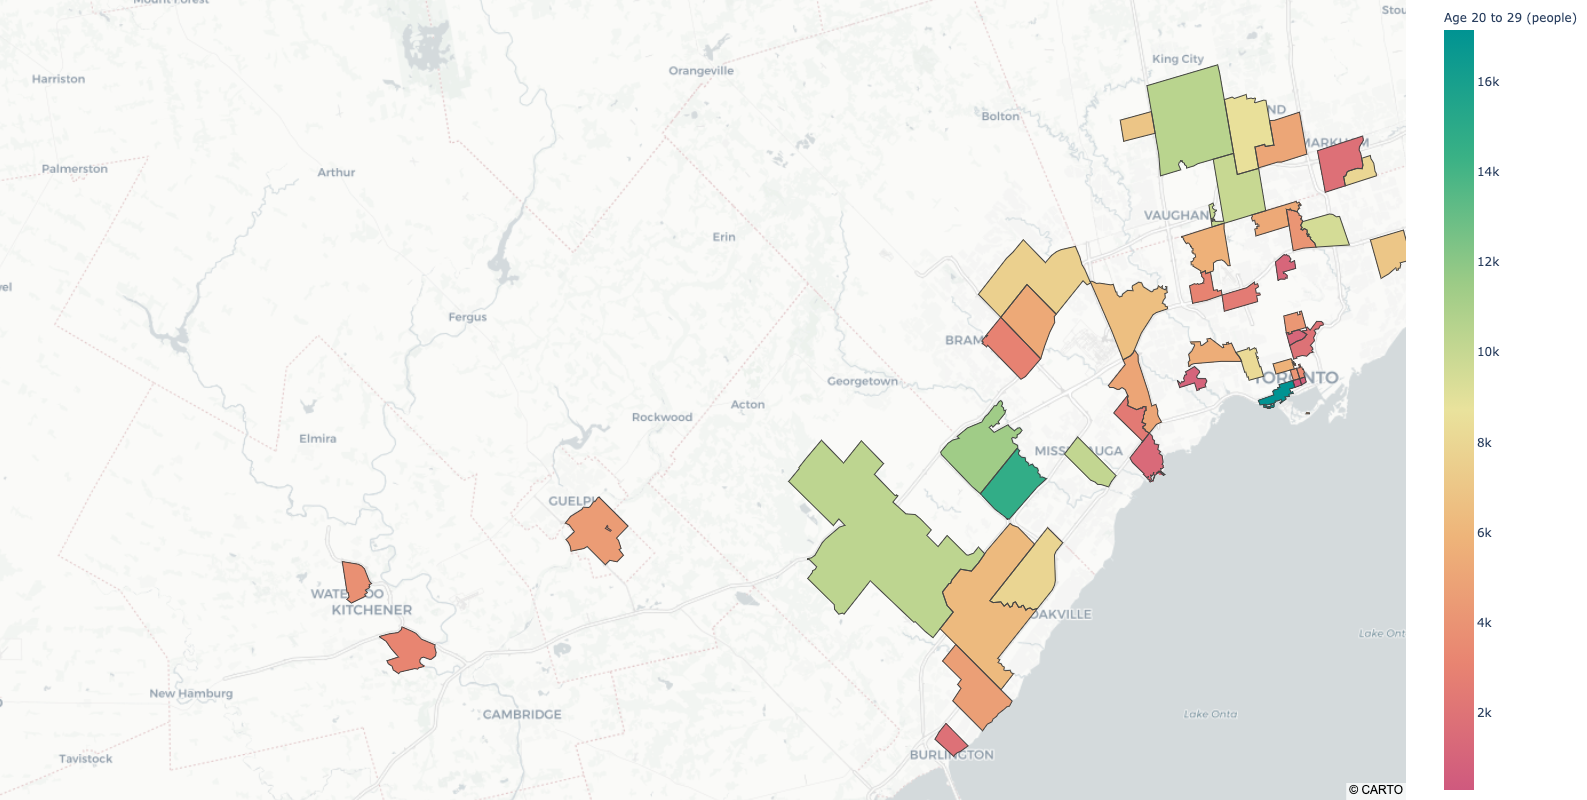

In [99]:
fig = px.choropleth_mapbox(grouped_per_fsa, 
                           geojson=geojson, 
                           color="Age 20 to 29 (people)",
                           locations="geo_id", # On the data DataFrame
                           featureidkey="properties.name",  # On the GeoJSON
                           hover_name="count",
                           center = {'lat':43.6472275, 'lon':-79.4045431}, 
                           mapbox_style="carto-positron", zoom=7,
                           color_continuous_scale="temps_r", 
                           height=800)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()